# Getting Started

The package `stochastic_matching` allows you to:

- Build a stochastic model (from scratch, from one of the provided models, or by some combination).
- Attach arrival rates on nodes to it.
- Study the theoretical stability of the system.
- Explore the feasible matching rates.
- Use a simulator to study the behavior of the system under pre-defined or custom-made policies.

## Graph building

Two types of graphs can be used:

- Simple graphs, where edges are pairs of distinct nodes.
- Hypergraphs, where edges are arbitrary non-empty subsets of nodes, possibly with multiplicity.

Simple graphs can be created from an adjacency matrix.

In [1]:
import numpy as np
import stochastic_matching as sm

adja = np.array([[0, 1, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 0, 1],
       [0, 1, 1, 0]])

diamond = sm.Model(adjacency=adja)

The graph can be displayed.

In [2]:
diamond.show_graph()

Hypergraphs can be build from their incidence matrix. For example, the following hypergraph is made of a line of three nodes with mono-edges at both ends. 

In [3]:
incidence = np.array([[1, 1, 0, 0],
                      [0, 1, 1, 0],
                      [0, 0, 1, 1]])
graph = sm.Model(incidence=incidence, names='alpha')

On display, edges are represented by small black nodes, and the edges displayed alway link one node to one edge.

In [4]:
graph.show_graph()

The package provides several graph generators to create graphs without manually describing them.

In [5]:
paw = sm.Tadpole()
paw.show_graph()

In [6]:
candy = sm.HyperPaddle(names='alpha')
candy.show_graph()

See the [Graphs notebook](graphs.ipynb) for details.

## Stability and achievable matching rates

To study a matching queues system, you need to associate a graph to arrival rates on nodes.

In [7]:
diamond = sm.CycleChain(names='alpha', rates=[2, 3, 2, 1])

From then you can see if a stable solution exists.

In [8]:
diamond.stabilizable

True

You can access the kernel space of solutions.

In [9]:
diamond.kernel

Kernels of a graph with 4 nodes and 5 edges.
Node dimension is 0.
Edge dimension is 1
Type: Surjective-only
Node kernel:
[]
Edge kernel:
[[ 1 -1  0 -1  1]]

You can have the *default* solution, which is the product of the arrival rates by the pseudo-inverse of the incidence matrix. Note that the default solution may not be positive even if a positive solution exists.

In [10]:
diamond.base_flow

array([1.25, 0.75, 1.  , 0.75, 0.25])

You can compute the maximin solution, which maximizes the minimum of the rates over all edges.

In [11]:
diamond.maximin

array([1.5, 0.5, 1. , 0.5, 0.5])

You can find a flow that maximizes a given edge. The following maximizes the last edge.

In [12]:
diamond.optimize_edge(4, 1)

array([2., 0., 1., 0., 1.])

We can also minimize it.

In [13]:
diamond.optimize_edge(4, -1)

array([1., 1., 1., 1., 0.])

Another possibility is to ask to maximize some reward based on weights on the edges.

In [14]:
diamond.optimize_rates([1, 2, 2, 2, 1])

array([1., 1., 1., 1., 0.])

In [15]:
diamond.optimize_rates([1, 2, 2, 2, 4])

array([2., 0., 1., 0., 1.])

Another possibility is to ask to maximize some reward based on weights on the edges.

We can also provide the incompressible flow, i.e. for each edge the minimal rate that goes through in any solution.

In [16]:
diamond.incompressible_flow()

array([1., 0., 1., 0., 0.])

Flows can be displayed using the `show_flow` method. If no flow is provided, the base flow is displayed.

In [17]:
diamond.show_flow()

In [18]:
diamond.show_flow(flow=diamond.maximin)

A color code shows the problematic nodes with flow conservation issues and non-positive edges.

In [19]:
diamond.show_flow(flow=diamond.optimize_edge(4, 1))

If you want to have a closer look to the polytope of solutions, you can display the kernel:

In [20]:
diamond.show_kernel(disp_flow=True, flow=diamond.maximin)

You can access the vertices of the polytope.

In [21]:
diamond.vertices

[{'kernel_coordinates': array([-0.25]),
  'edge_coordinates': array([1., 1., 1., 1., 0.]),
  'null_edges': [4],
  'bijective': True},
 {'kernel_coordinates': array([0.75]),
  'edge_coordinates': array([2., 0., 1., 0., 1.]),
  'null_edges': [1, 3],
  'bijective': False}]

You can display a vertex.

In [22]:
diamond.show_vertex(0)

In [23]:
diamond.show_vertex(1)

See the [Algebra notebook](analysis.ipynb) for more details.

## Simulations

To run a simulation, you just need to specify:

- A policy (using the name of an implemented policy or providing a custom one)
- Number of arrival rates to simulate (default to 1,000,000)
- The maximal queue size (default to 1,000)
- A random seed (optional)

The simulator returns an estimate of the stability of the policy: False if a queue was maxed before the end, True otherwise.

In [24]:
diamond.run('longest_queue', number_events=10000000)

True

The results of simulation are stored in a `logs` attribute that contains:

- The number of matchings for each edge
- For each node and state, the number of steps spent by that node in that state
- Number of steps performed

In [25]:
diamond.simulator.logs

{'trafic': array([1666294,  833161, 1248177,  834437,  417930], dtype=uint32),
 'queue_log': array([[7406591, 1430663,  656181, ...,       0,       0,       0],
        [6669353, 1331370,  799199, ...,       0,       0,       0],
        [8891848,  739561,  246527, ...,       0,       0,       0],
        [7655252, 1463697,  563651, ...,       0,       0,       0]],
       dtype=uint32),
 'steps_done': 10000000}

The flow can be displayed.

In [26]:
diamond.show_flow()

The CCDFs can be computed and shown.

In [27]:
diamond.simulator.compute_ccdf()[:, :20]

array([[1.000000e+00, 2.593409e-01, 1.162746e-01, 5.065650e-02,
        2.159100e-02, 9.096500e-03, 3.808300e-03, 1.580500e-03,
        6.548000e-04, 2.794000e-04, 1.233000e-04, 5.540000e-05,
        2.420000e-05, 9.500000e-06, 3.600000e-06, 1.600000e-06,
        5.000000e-07, 1.000000e-07, 0.000000e+00, 0.000000e+00],
       [1.000000e+00, 3.330647e-01, 1.999277e-01, 1.200078e-01,
        7.199580e-02, 4.318020e-02, 2.594250e-02, 1.561390e-02,
        9.367200e-03, 5.598400e-03, 3.347400e-03, 1.991900e-03,
        1.175400e-03, 6.882000e-04, 3.905000e-04, 2.103000e-04,
        1.165000e-04, 6.600000e-05, 3.670000e-05, 2.200000e-05],
       [1.000000e+00, 1.108152e-01, 3.685910e-02, 1.220640e-02,
        4.029900e-03, 1.323500e-03, 4.437000e-04, 1.550000e-04,
        5.620000e-05, 1.990000e-05, 7.400000e-06, 3.500000e-06,
        1.600000e-06, 4.000000e-07, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00],
       [1.000000e+00, 2.344748e-01, 8

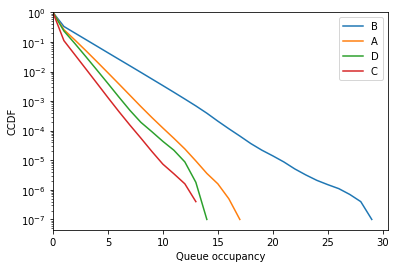

In [28]:
fig = diamond.simulator.show_ccdf(sort=True)

The queues occupancies are given by:

In [29]:
diamond.simulator.compute_average_queues()

array([0.4635007, 0.8327802, 0.1659218, 0.3717655])

They can be displayed (optionally sorted).

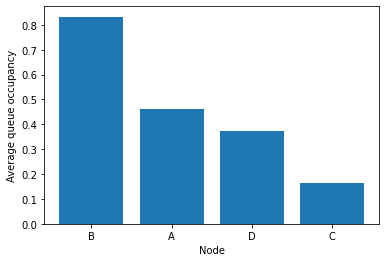

In [30]:
fig = diamond.simulator.show_average_queues(sort=True)

It is possible to use the arrival rates to express the results as waiting times.

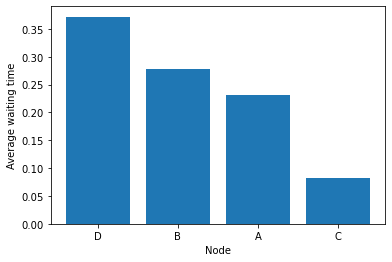

In [31]:
fig = diamond.simulator.show_average_queues(sort=True, as_time=True)

See the [Simulation notebook](simulator.ipynb) for more details.